In [1]:
from IPython.display import HTML, Image, YouTubeVideo
import graphviz

# MSDS688 - Artifical Intelligence

# Week 2 - Searching for Solutions

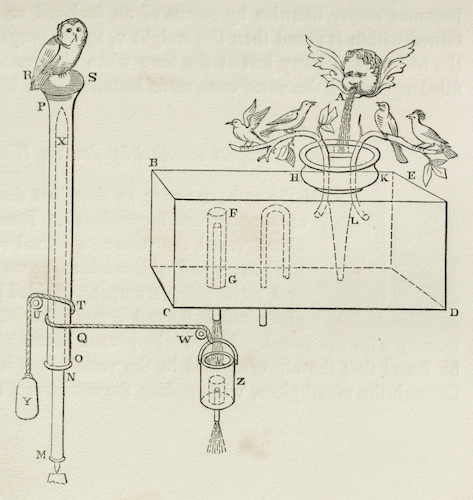

In [2]:
Image('images/Pneumatica.jpg')

Illustration from an 1851 English edition of Hero’s Pneumatica, in which he describes machines working on _air, steam or water pressure_.

Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

## Graphs - A concise introduction

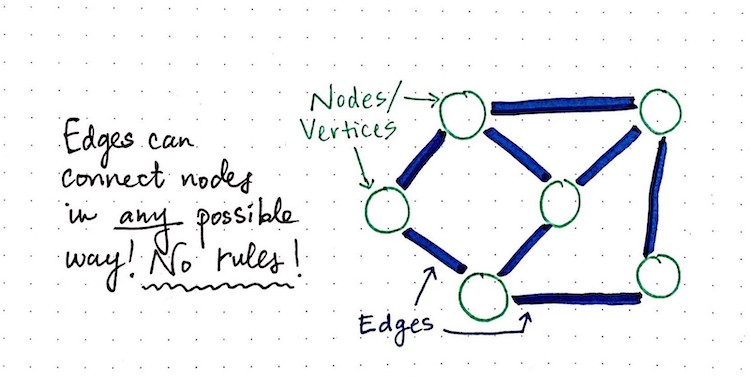

In [3]:
Image('images/edges.jpeg')

Graphs are used to model connections between people, links to websites, transportation and computer networks.  _In AI, nodes track state of the environment and edges represent the action that caused the transition._  

### Edges 

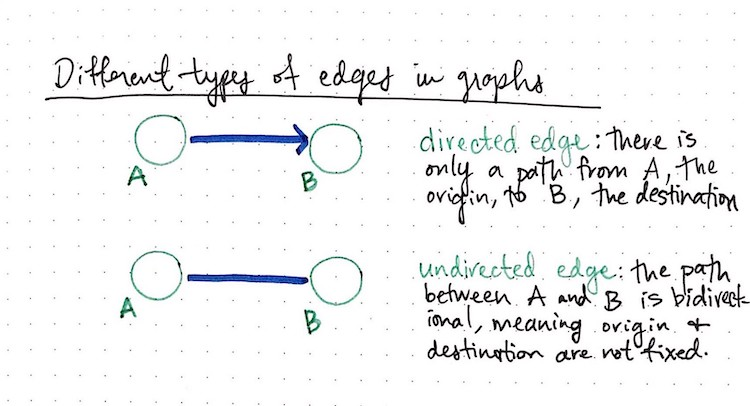

In [4]:
Image('images/directed_vs_undirected.jpeg')

### Graphs vs Trees

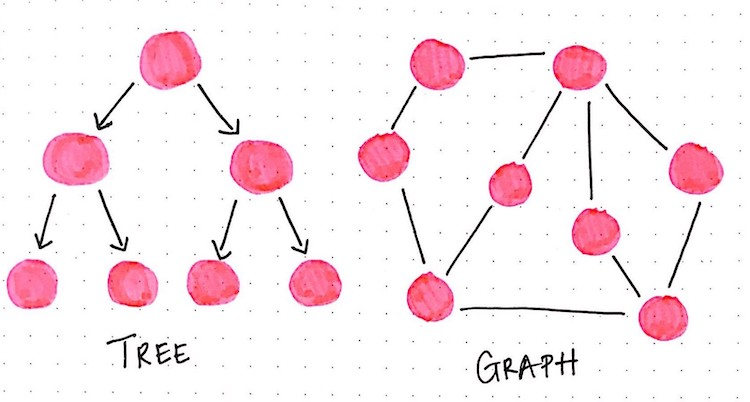

In [5]:
Image('images/graph_vs_tree.jpeg')

# Commonalities and Differences

* A __graph__ consists of a set of nodes connected by edges.  
* A __tree__ is a graph without cycles. 

Cite: [A Gentle Introduction To Graph Theory](https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8)

Directed edges form a one-way connection between nodes, undirected are two-way connections. The choice is dictated by the problem your are modeling -- think facebook vs twitter.  

Cite: [A Gentle Introduction To Graph Theory](https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8)

## Concept of search space size

* Actions _can_ cause transitions from one state to the next

* Vacuuming an already clean cell in vacuum world -- _does not_

*  But it still adds to _cost_

* How big can a state space be?

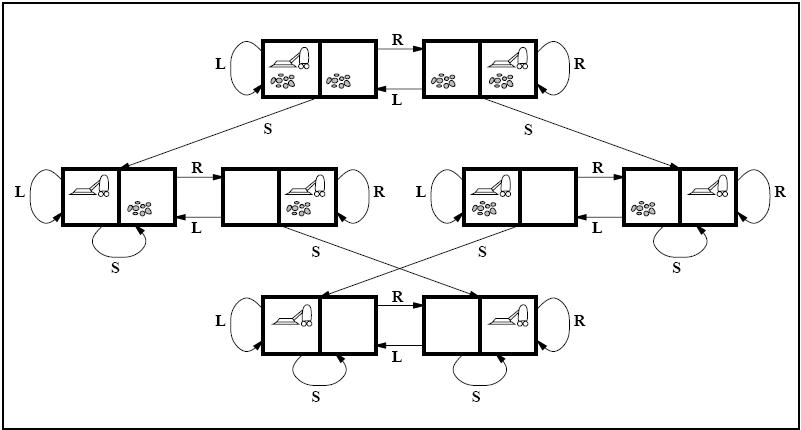

In [6]:
Image('images/simple_problem_solving_agent.jpg')

    
## Chess - How big is it's state space?

* 2 x 16 pieces on an 8 x 8 board

* 30 possible moves per player per round

* 30 x 30 = 900 ~ 1000 possible moves per round

* 10^120 > Number of atoms universe 

* Effectively infinite in terms of computation

* How can find a solution in spaces so large?  

* Efficiently?

* Optimally?

# Why Search?

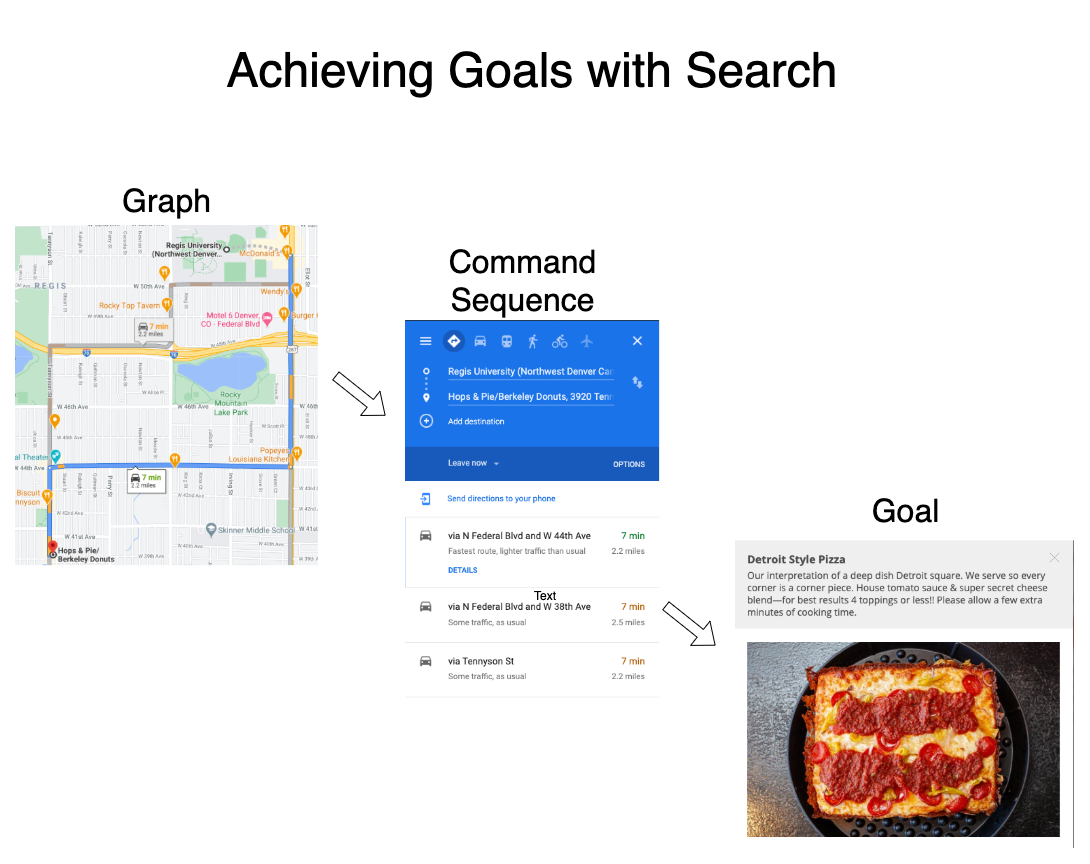

In [7]:
Image('./images/achieve-goals-search.png')

## Search -- Finding action sequences that achieve goals

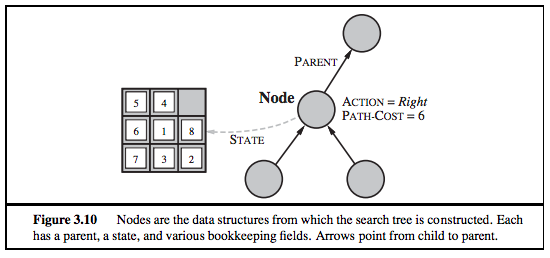

In [8]:
Image('images/Figure-S3-10.png')

## Search -- Finding the shortest paths

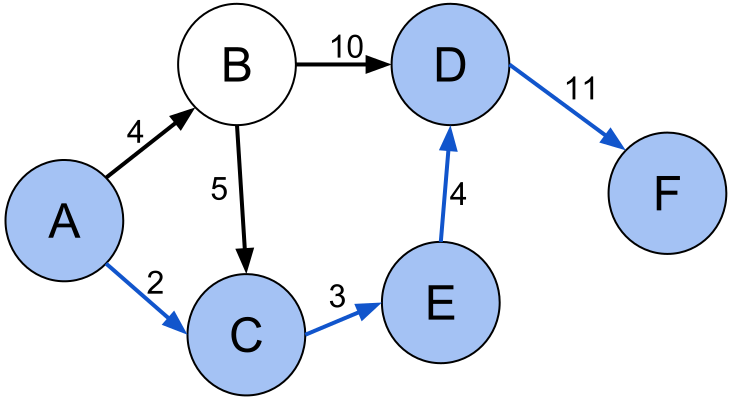

In [9]:
Image("./images/Shortest_path_with_direct_weights.png")

Cite: By Artyom Kalinin - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=29980338

## Search -- Laying out of circuits on computer chips

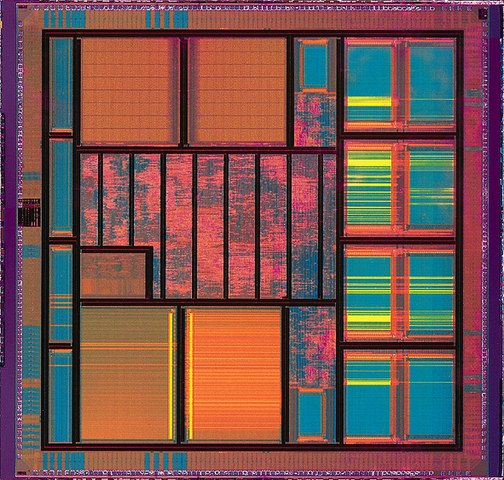

In [10]:
Image("./images/504px-Diopsis.jpg")

Cite: By Unknown - Unknown, original uploader on English Wikipedia was User:PeterJohnBishop, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=1340494

## Search Overview

* Problem solving through exploration of the state space 

* Begin at an initial or starting state

* Navigate from one state to the next by taking actions

* Use algorithms to find goal states

* Algorithms power our agents

## What are we trying to solve?

* What is a **problem**?

* Or even recognize a **solution**?

* What **algorithms** can we use?

## Problem

* __Initial state__ - The state where the agent begins its search

* __Path cost__ - Expresses the expense of reaching the current state 

* __Transition model__ - What state will result for each possible action

* __Goal test__ - Is the current state a goal?  Are we there yet?

_Abstracting the problem to the essetial elements needed to find a solution _

## Solutions

* Solution
    - __Path__ is a sequence of nodes from the start to the goal
    - __Cost__ the length of the path measured in nodes or edge distance

* Remember vacuum world?  Solutions are lowest states with multiple many paths leading there.

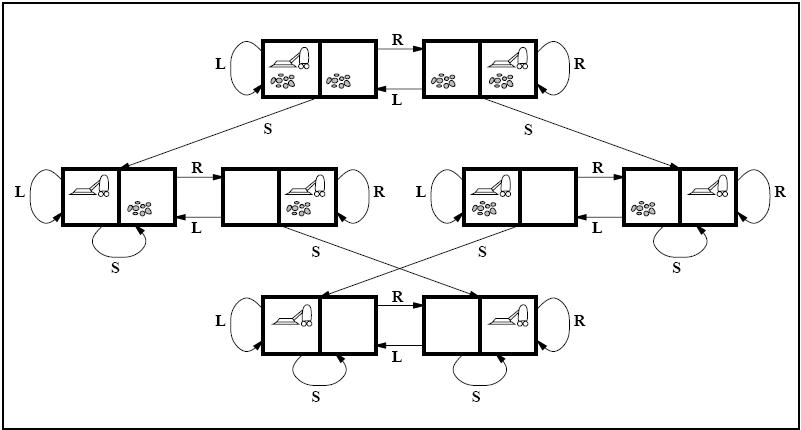

In [11]:
Image('images/simple_problem_solving_agent.jpg')

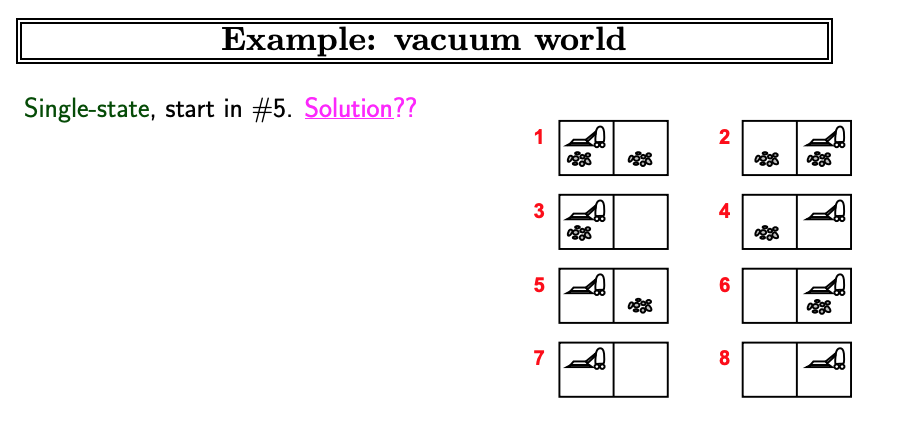

In [12]:
Image("images/vacuum-world-solution-1.png")

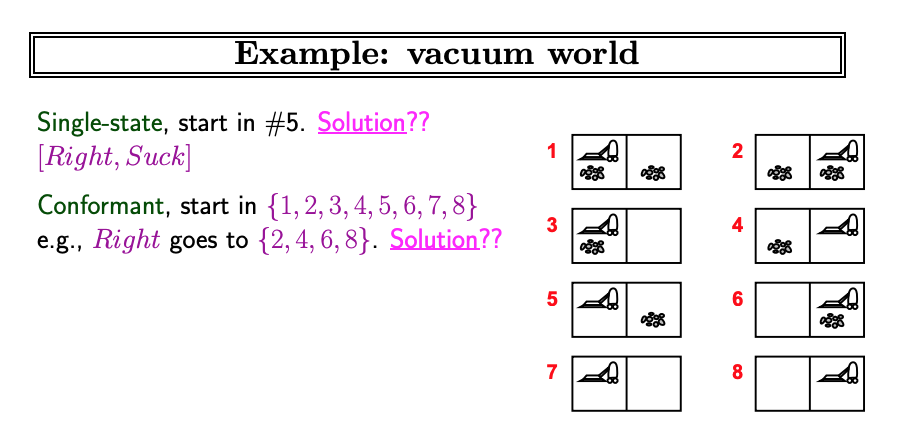

In [13]:
Image("images/vacuum-world-solution-2.png")

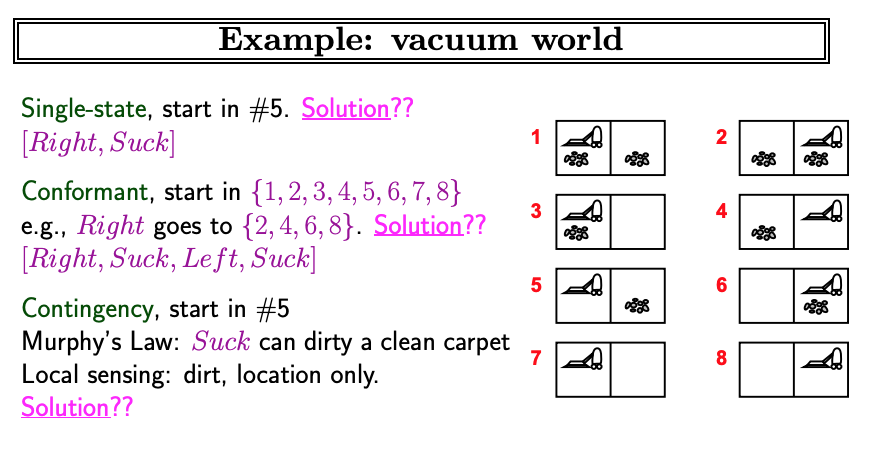

In [14]:
Image("images/vacuum-world-solution-3.png")

# What kinds of search algorithms are there?

* **Uninformed search algorithms** 
    - Have no knowledge other the problem definition
    - Has a start state
    - Will recognize the goal state

* **Informed search algorithms** 
    * Finds the solution efficiently
    * Leverage information about the environment
    * Use a heuristics - An _under-estimate_ of cost to reach the goal
    * Or path cost - Distance traveled to current state

# Break -- What does this graph look like?

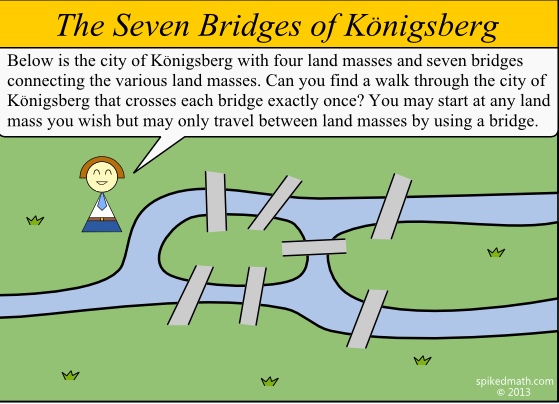

In [15]:
Image('images/541-solutions-to-the-seven-bridges-of-konigsberg.png')

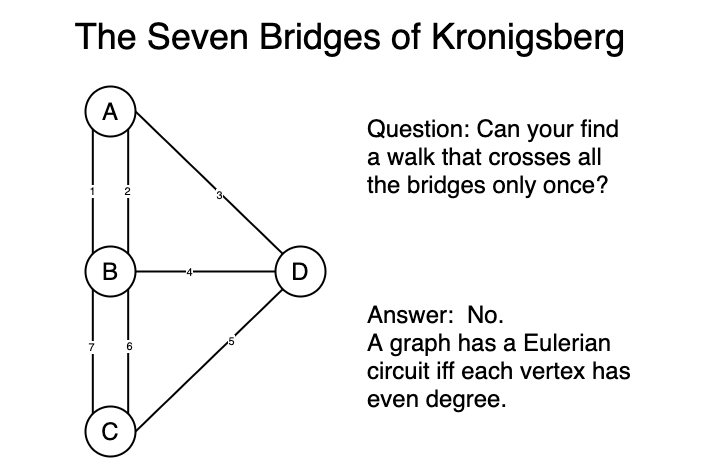

In [16]:
Image('./images/bridges-of-konigsberg.png')

## Paths

* Eulerian path visits ever edge
* Hamiltonian path visits every vertex once
* There is a hamiltonian path but no eulerian path

# Uninformed: Depth First Search vs Breadth Depth Search

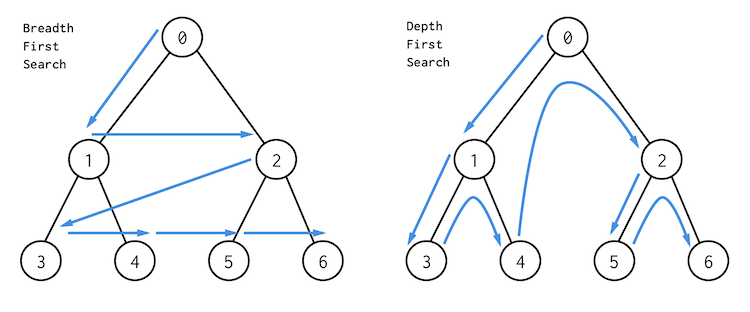

In [17]:
Image('images/binary_tree_search.png')

Cite: Kozik, M. (2017, September 10). DFS on Binary Tree Array. Retrieved July 14, 2018, from [http://mishadoff.com/blog/dfs-on-binary-tree-array/](http://mishadoff.com/blog/dfs-on-binary-tree-array/). 

## What is the difference?

* _Depth First Search_ uses a __Stack__

* _Breadth First Search_ uses a __Queue__

* _The algorithm is the same!_

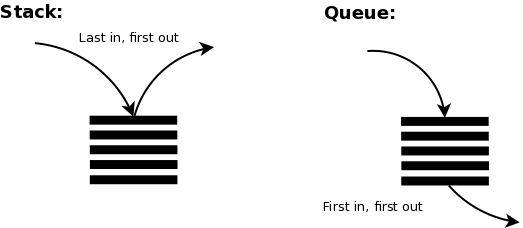

In [18]:
Image('images/stack-vs-queue.png')   

##  Search separates the search space into regions

* __Explored__ - Nodes that have been visited (no longer in the queue)

* __Frontier__ - Nodes we are about to explore (currently in the queue)

* __Unexplored__ - Nodes we have not yet expanded (never have been in the queue)


# Search Space Regions

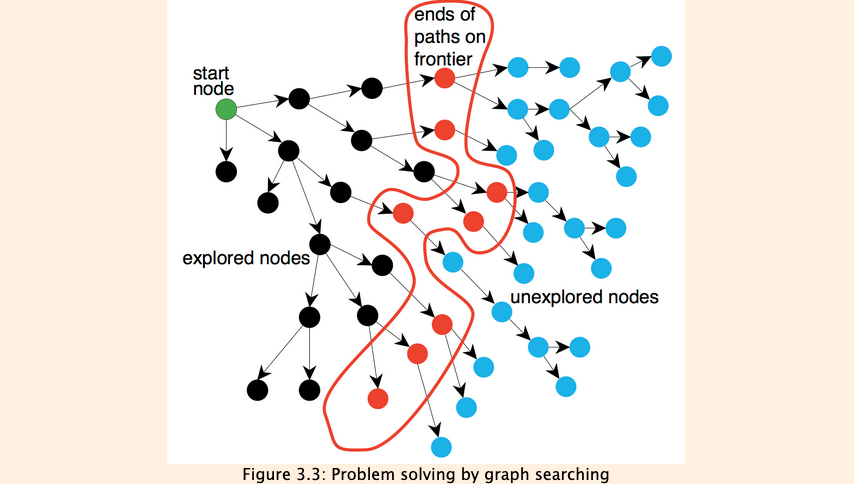

In [19]:
Image('./images/explored-frontier-unexplored-tree.png')

## Breadth First Search

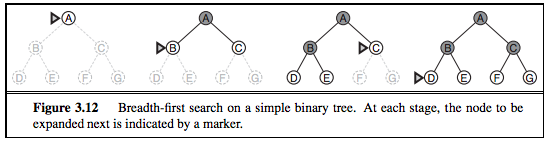

In [20]:
Image('images/Figure-S3-12.png')

# BFS memory growth is exponential

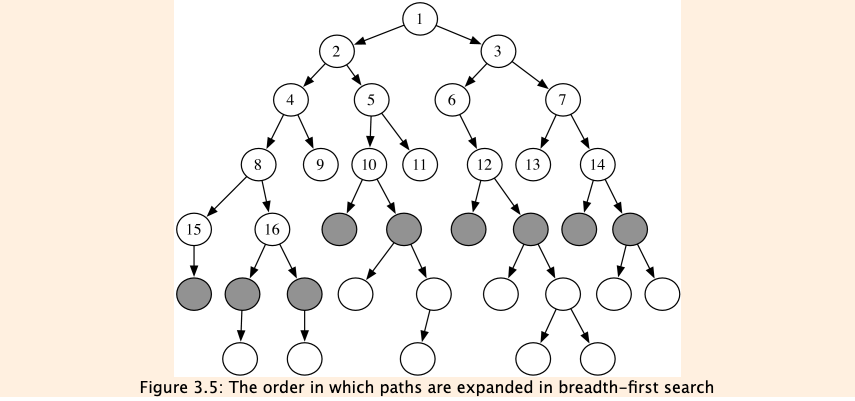

In [21]:
Image('./images/bfs-frontier.png')

## Depth First Search

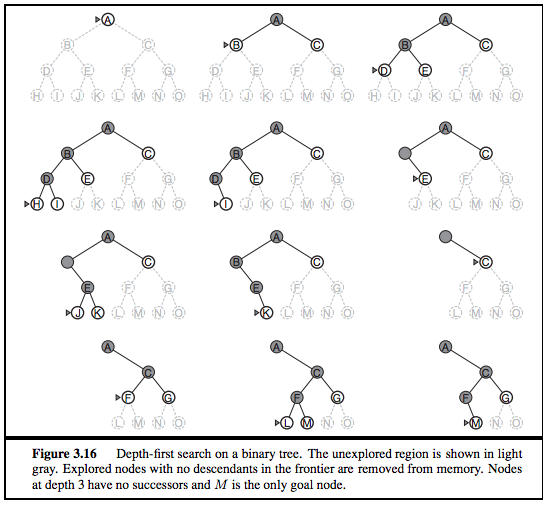

In [22]:
Image('images/Figure-S3-16.png')

# DFS memory growth is linear

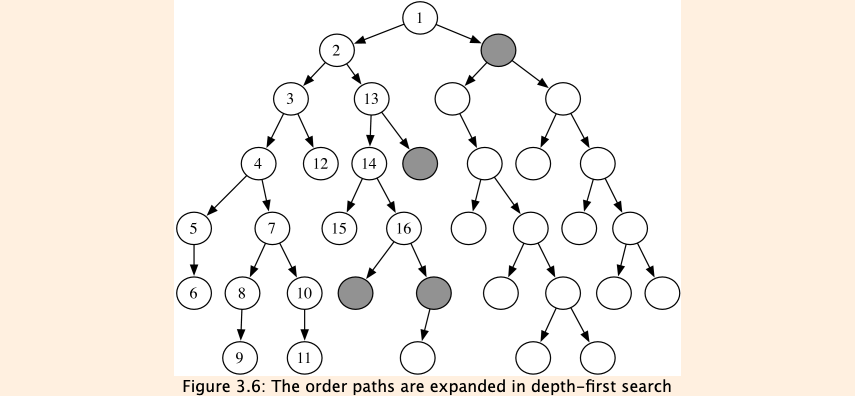

In [23]:
Image('./images/dfs-frontier.png')

## Depth First Search Algorithm

__function__ DEPTH-FIRST-SEARCH(_problem_) __returns__ a solution, or failure 

&emsp;_node_ &larr; a node with STATE = _problem_.INITIAL\-STATE, PATH\-COST = 0  
&emsp;__if__ _problem_.GOAL\-TEST(_node_.STATE) __then return__ SOLUTION(_node_)<br>
&emsp;_frontier_ &larr; a LIFO queue with _node_ as the only element  
&emsp;_explored_ &larr; an empty set

&emsp;__loop do__  
&emsp;&emsp;&emsp;__if__ EMPTY?(_frontier_) __then return__ failure<br>
&emsp;&emsp;&emsp;_node_ &larr; POP(_frontier_) /\* chooses the deepest node in _frontier_ \*/<br>
&emsp;&emsp;&emsp;add _node_.STATE to _explored_  

&emsp;&emsp;&emsp;__for each__ _action_ __in__ _problem_.ACTIONS(_node_.STATE) __do__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_child_ &larr; CHILD\-NODE(_problem_,_node_,_action_)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _child_.STATE is not in _explored_ or _frontier_
__then__ <br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _problem_.GOAL\-TEST(_child_.STATE)
__then return__ SOLUTION(_child_)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_frontier_ &larr; INSERT(_child_,_frontier_)  

---

## Efficiency of Uninformed Search Algorithms
&emsp;&emsp;&emsp;

|Algorithm | Depth| Nodes |Time     |   Memory    | Space Complexity | Time Complexity |
|----------|:----:|:-----:|:-------:|------------:|-----------------:|----------------:|
|   BFS    | 16   | 10^16 | 350 yr  | 10 exabytes | O(b ^ d)         |  O(b ^ d)       |
|   DFS    | 16   | 160   | seconds | 155 Kb      | O(b x m)         |  O(b ^ m)       |

&emsp;&emsp;&emsp;

**b** == branching factor (e.g., actions) &emsp; **m** == memory storage size &emsp; **d** == depth of the tree

## Demo: Visualizing Search

[PathFinding.js](https://qiao.github.io/PathFinding.js/visual/) - A comprehensive path-finding library for grid based games and demo

# Informed search -- How

* Priority queues are sorted --> The "Best" value is always returned

* Using a function to evaluate the node and return a score

* Return value is based on the state the node represents

* Example: Number of pieces a player has in checkers

# Informed search algorithms

* Queue ordering has a big effect as we just saw.

* How better order our queue to find solutions efficiently?

# Greedy Search or Hill Climbing Search

__function__ GREEDY_SEARCH(_problem_) __returns__ a state that is a local maximum  
&emsp;_current_ &larr; _problem_.INITIAL\-STATE  
&emsp;__loop do__  
&emsp;&emsp;&emsp;_neighbor_ &larr; a highest\-valued successor of _current_  
&emsp;&emsp;&emsp;_if_ VALUE(_neighbour_) &le; VALUE(_current_) __then return__ _current_  
&emsp;&emsp;&emsp;_current_ &larr; _neighbor_  

---

## Applications of Best First Search

* _Best First Search_ -- Uses a priority queue ordered by a function

* _Uniform Cost Search_ -- Best FS w/ function that minimizes __path cost__ -- g(n)

* _Greedy BFS_ -- Best FS w/ function that uses a __heuristic__ estimate -- h(n)

* _A* Search_ -- Best FS w/ function that minimizes __path cost _plus_ heuristic__ -- g(n) + h(n)

## Search Algorithms

__function__ BEST-FIRST-SEARCH(_problem_) __returns__ a solution, or failure 

&emsp;_node_ &larr; a node with STATE = _problem_.INITIAL\-STATE, PATH\-COST = 0  
&emsp;_frontier_ &larr; a priority queue ordered by PATH\-COST, with _node_ as the only element  
&emsp;_explored_ &larr; an empty set 

&emsp;__loop do__  

&emsp;&emsp;&emsp;__if__ EMPTY?(_frontier_) __then return__ failure

&emsp;&emsp;&emsp;_node_ &larr; POP(_frontier_) /\* chooses the lowest\-cost node in _frontier_ \*/

&emsp;&emsp;&emsp;__if__ _problem_.GOAL\-TEST(_node_.STATE) __then return__ SOLUTION(_node_)

&emsp;&emsp;&emsp;add _node_.STATE to _explored_ 

&emsp;&emsp;&emsp;__for each__ _action_ __in__ _problem_.ACTIONS(_node_.STATE) __do__  

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_child_ &larr; CHILD\-NODE(_problem_,_node_,_action_) 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _child_.STATE is not in _explored_ or _frontier_ __then__  

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;_frontier_ &larr; INSERT(_child_,_frontier_)

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__else if__ _child_.STATE is in _frontier_ with higher PATH\-COST 
__then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;replace that _frontier_ node with _child_  

---


## Cost Limits of Search

* __Time complexity__ - Causes solution to take to long

* __Space complexity__ - Limits search to what fits in memory 

### Measures of Perfomance


* __Completeness__     - Is it guaranteed to find solution? If one exists.
* __Optimality__       - Does it always find the best solution? 
* __Time complexity__  - How long does it take to find? 
* __Space complexity__ - How much memory does it take? 


### Effects of seach space size

* __Search cost is a function size of the search space__

* __What determines search space size__

    - b = branching factor (#actions)
    - d = depth to the root (#edges to the initial state)
    - m = maximum length of any path (can be infinite)

* __Search spaces can be infinitely large__

    - Recurrent processes
    - Example: Markov chain

## Search Efficiency


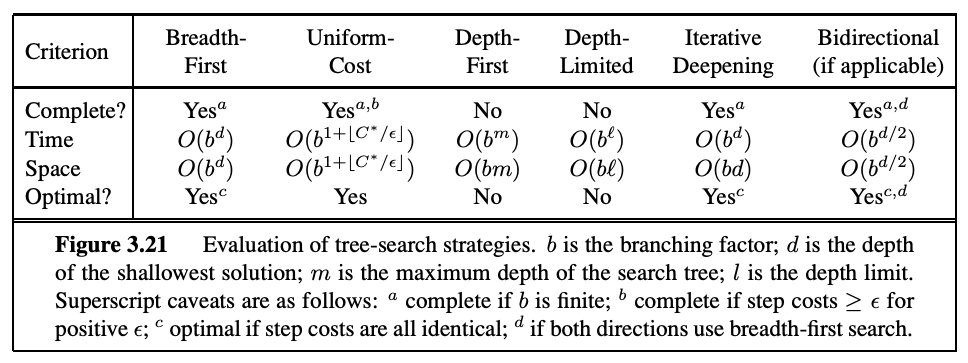

In [24]:
Image("images/Figure-S3-21-search-efficiency.png")

# Search Exercises

In _what order are the nodes explored_ using the following algorithms.

* __Depth First Search__, expands the left-most node until forced to backtrack

* __Least Cost Search__, or Best First Search using path cost (_g_) for _f_

* __Greedy Search__, or Best First Search using path cost (_h_) for _f_

* __A* Search__, or Best First Search using path cost (_g_ + _h_) for _f_

# Tree Search Example

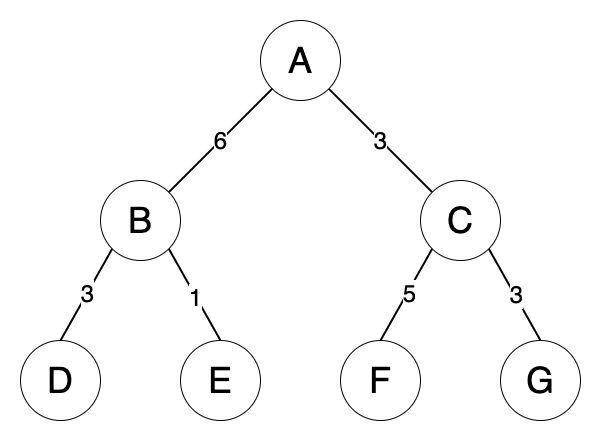

In [25]:
Image("images/tree-search-exercise.png")

# Graph Search Example

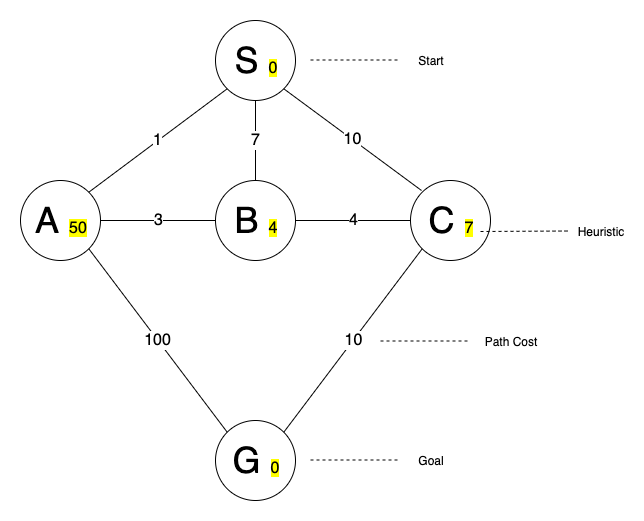

In [26]:
Image("images/search-example-graph.png")

## Solution

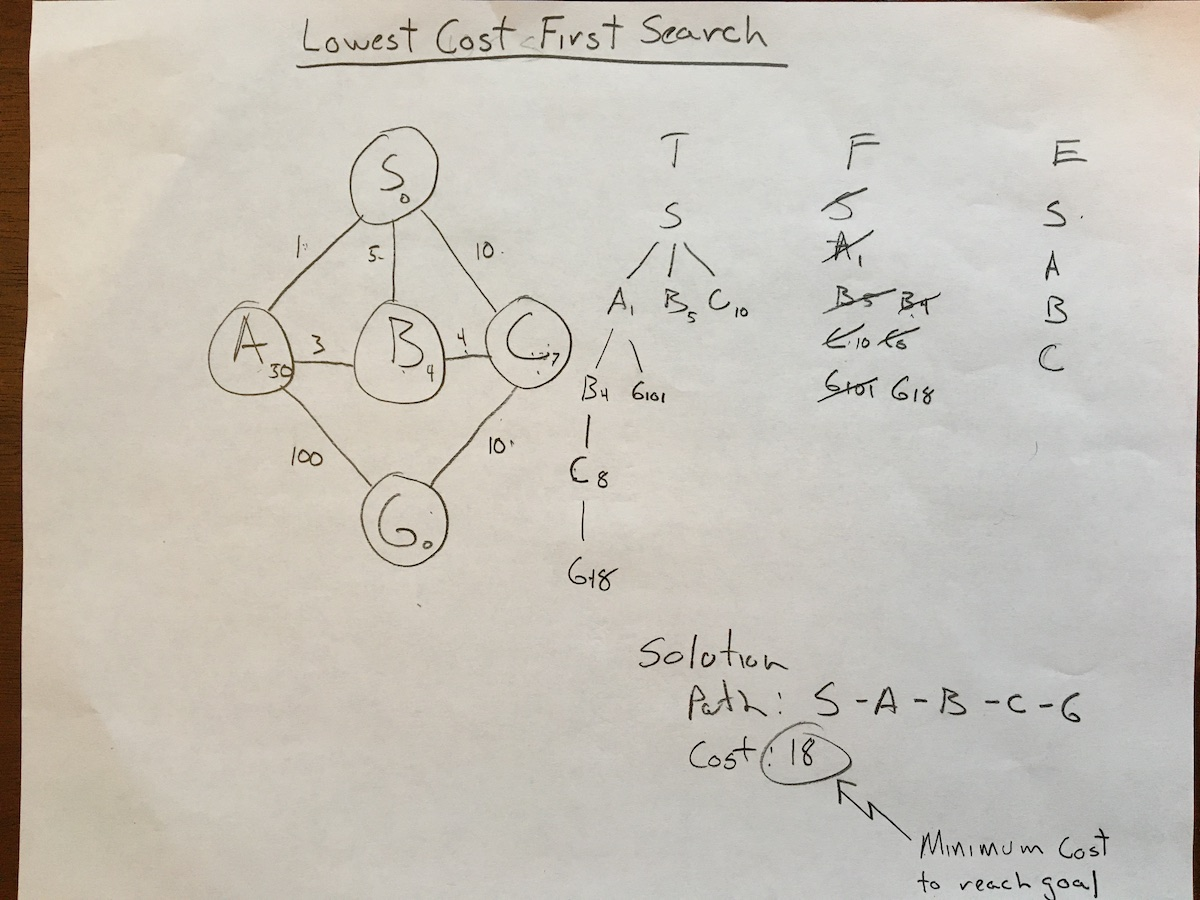

In [27]:
Image('./images/lowest-cost-search.jpg')

---

# Apply greedy search

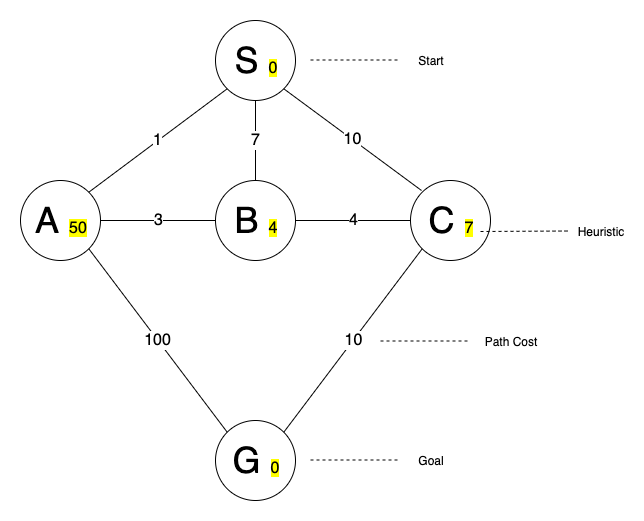

In [28]:
Image("images/search-example-graph.png")

## Solution

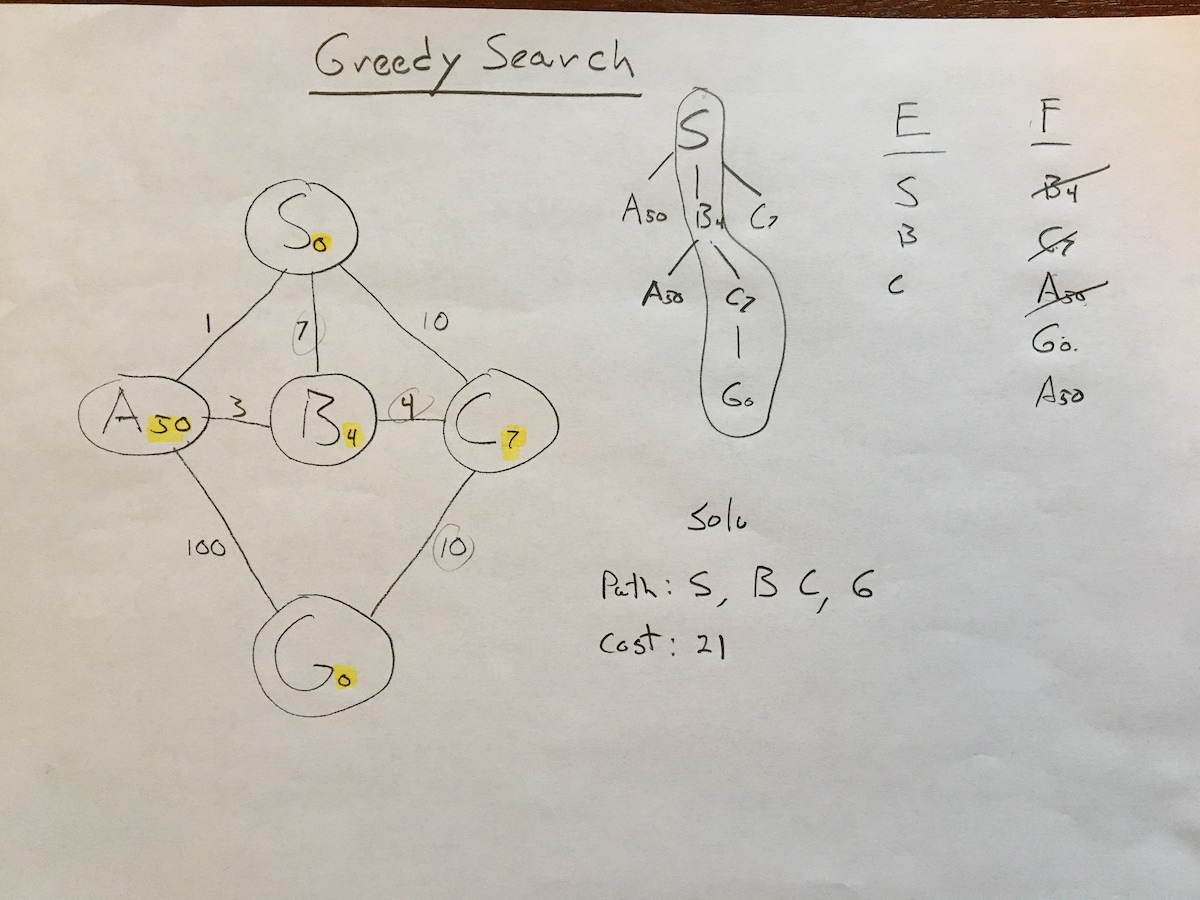

In [29]:
Image('./images/gready-search-with-inconsistent-heuristic.jpg')

---

# Apply A-Star search

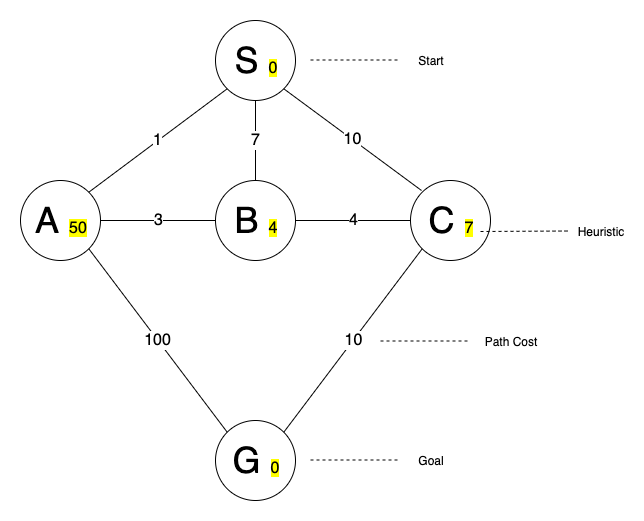

In [30]:
Image("images/search-example-graph.png")

---

## Heuristic

_A heuristic is the estimated cost of reaching the goal from a particular node_

### Admissible Heuristic Definition

* Admissible:  H(x, g) <= P(x, g) where H = heuristic, P = path cost

* An _underestimate_ of path cost to the goal

* Straight line distance is admissible since it is less than or equal to travel distance

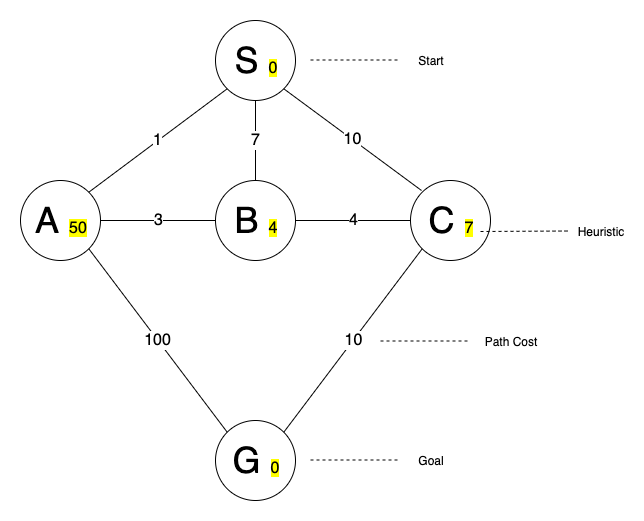

In [31]:
Image("images/search-example-graph.png")

### Consistent Heuristic

* | H(x,g) - H(y, g) | <= P(x,y)

* The difference between the heursistic values of any two points must be less than the path length between them.  

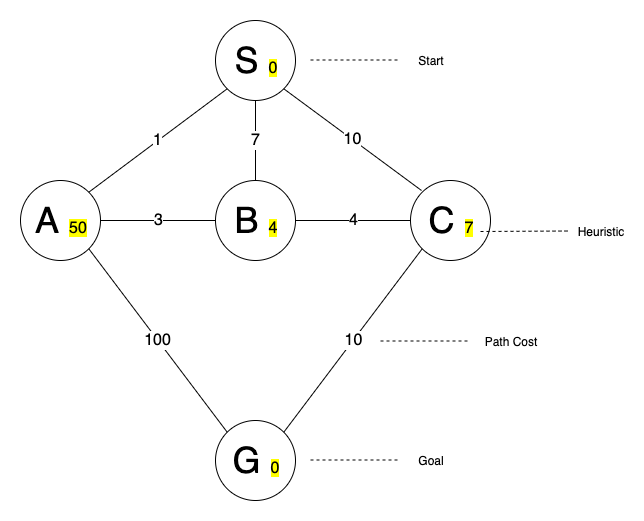

In [32]:
Image("images/search-example-graph.png")

### This heuristic

* Is __admissible__ because each heuristic is an underestimate of the cost to reach the goal
* Not __consistent resulting in a non-optimal solution__

## Solution

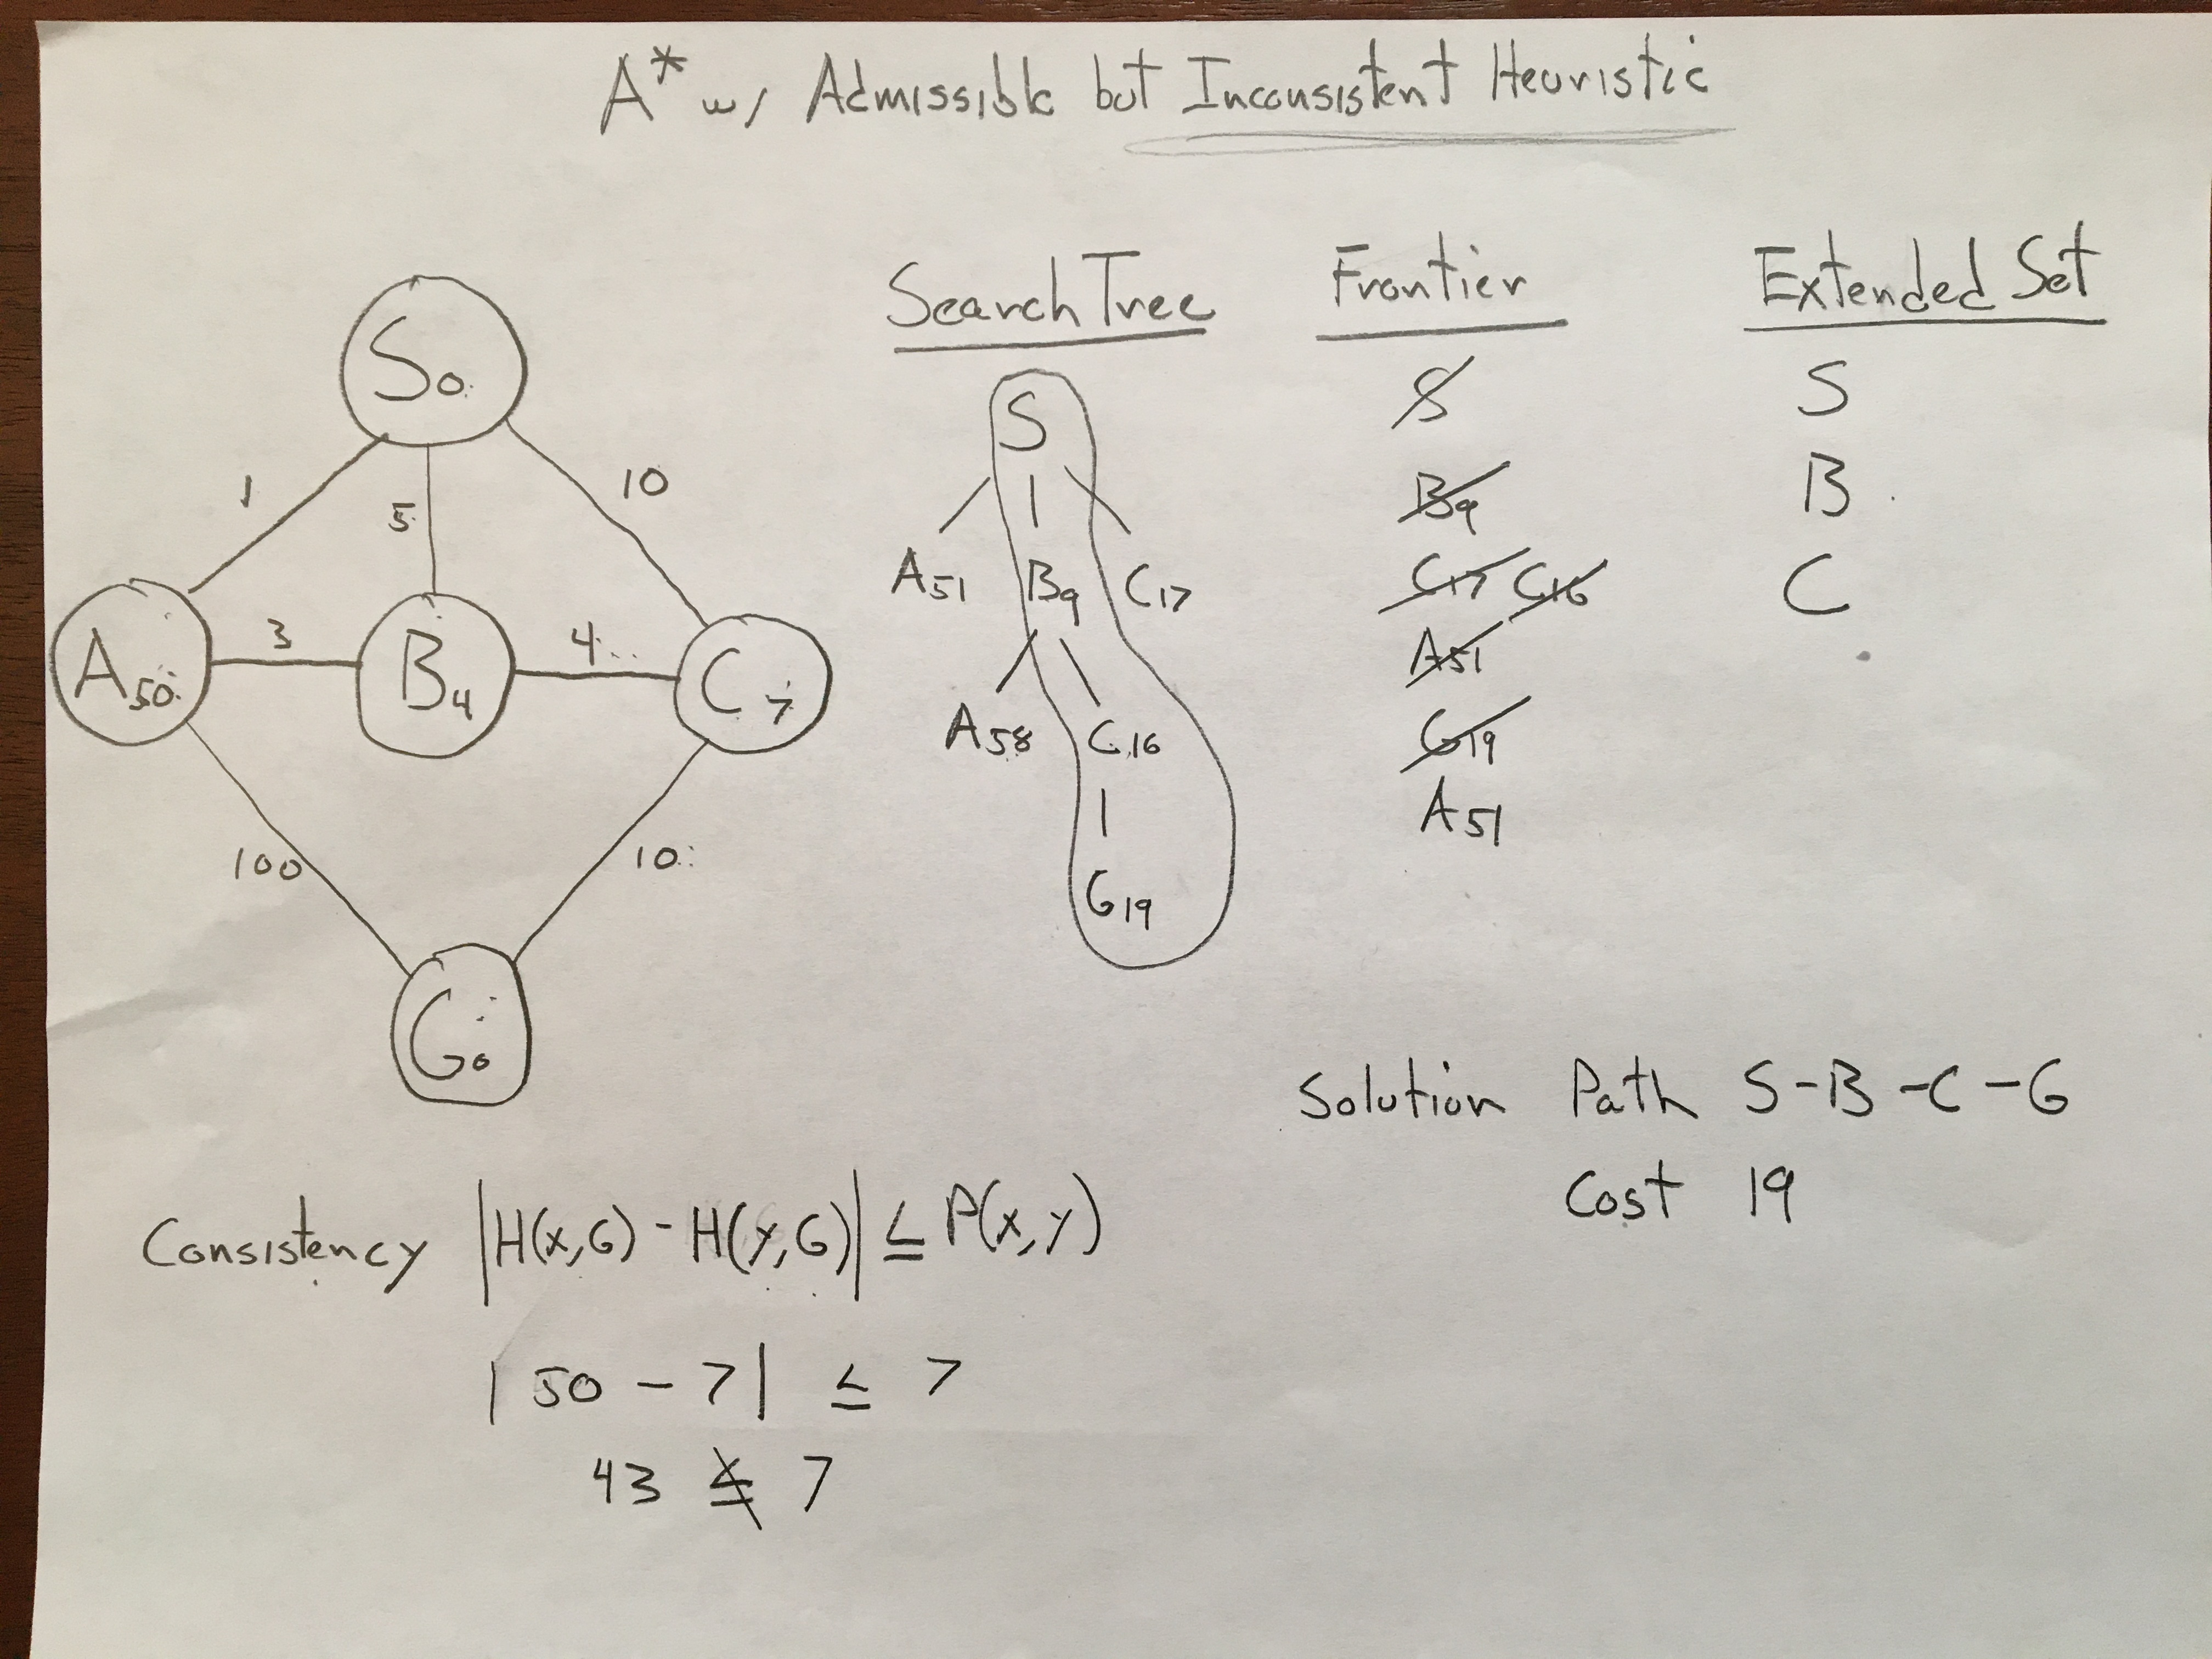

In [33]:
Image('./images/a-star-inconsistent-heuristic-solution.jpg')

## Questions